## Binary classification

I use wholesale customers purchasing data and build a model that predicts whether a wholesale customer is a Hotel/Restaurant/Cafe or not. 

The data set that use has information about customers annual spending on fresh products, milk products, grocery, detergents and paper products, frozen products and delicatessen products. 

In [3]:
import seaborn as sns
sns.set()

In [4]:
import pandas as pd

df_wholesale = pd.read_csv('small_data/Wholesale_customers.csv')

df_wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0,3,12669,9656,7561,214,2674,1338
1,0,3,7057,9810,9568,1762,3293,1776
2,0,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,0,3,22615,5410,7198,3915,1777,5185


'Channel' is the column that describes the category (purchasing channel) of customers, 1 is a Hotel/Restaurant/Cafe customer and 0 is not. 

I build a classifier by only using two features, annual spending on frozen products and annual spending on milk products. This makes it easier for us to visualize the data and the predictions of the model.

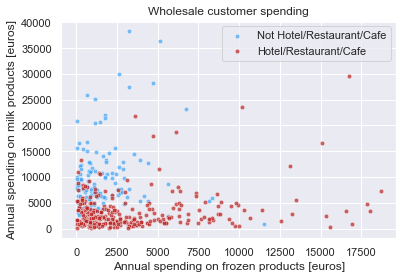

In [5]:
import matplotlib.pyplot as plt

feature_1 = 'Frozen'
feature_2 = 'Milk'
cat_dict = {1: 'Hotel/Restaurant/Cafe', 0: 'Not Hotel/Restaurant/Cafe'}
color_dict = {1: '#ba2121ff', 0: '#42a5f5ff'}

groups = df_wholesale.groupby('Channel')
for name, group in groups:
    plt.scatter(group[feature_1], group[feature_2], edgecolor='w', lw=0.5,
                s=20, alpha=0.7, label=cat_dict[name], c=color_dict[name])
    
plt.title('Wholesale customer spending')
plt.xlabel('Annual spending on {} products [euros]'.format(feature_1.lower()))
plt.ylabel('Annual spending on {} products [euros]'.format(feature_2.lower()))
plt.legend(loc='upper right');

I build a logistic regression model which is a classification algorithm 

In [6]:
from sklearn.linear_model import LogisticRegression

X = df_wholesale[[feature_1, feature_2]]
y = df_wholesale['Channel']

logistic_classifier = LogisticRegression() # create an instance of the predictor

logistic_classifier.fit(X, y);   # fit the model
first_5_pred = logistic_classifier.predict(X[:5])  # make predictions for first 5 observations

print('Predictions for the first 5 observations from the training data set:')
print(first_5_pred)

Predictions for the first 5 observations from the training data set:
[0 0 0 1 1]


In [7]:
# convert numeric categories to english
first_5_pred_english = [cat_dict[pred] for pred in first_5_pred] 

print('Predictions for the first 5 observations from the training data set:')
for pred in first_5_pred_english:
    print(pred)

Predictions for the first 5 observations from the training data set:
Not Hotel/Restaurant/Cafe
Not Hotel/Restaurant/Cafe
Not Hotel/Restaurant/Cafe
Hotel/Restaurant/Cafe
Hotel/Restaurant/Cafe


In [8]:
first_5_pred_prob = logistic_classifier.predict_proba(X[:5])
print('Predicted probabilities for each class:')
print(first_5_pred_prob)

Predicted probabilities for each class:
[[0.81004537 0.18995463]
 [0.70399658 0.29600342]
 [0.56264589 0.43735411]
 [0.01709973 0.98290027]
 [0.17425427 0.82574573]]


Let's take a look at how the model assigns probabilities to different regions of our two-dimensional feature space. a heatmap of predicted probability of a customer being a Hotel/Restaurant/Cafe based on their frozen and milk products spending.

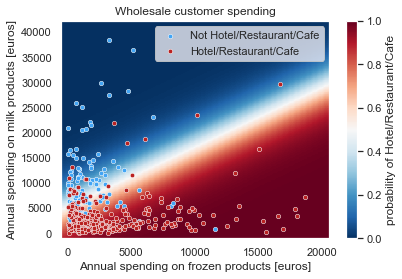

In [9]:
from pylib.pml_plotting import predicted_probabilities_heatmap

# plot predicted probabilities
predicted_probabilities_heatmap(logistic_classifier)

# plot the data
for name, group in groups:
    plt.scatter(group[feature_1], group[feature_2], edgecolor='w', lw=0.5,
                s=20, label=cat_dict[name], c=color_dict[name])

plt.axis('auto'); 
plt.xlim([-500, 1.1*X[feature_1].max()])
plt.ylim([-1000, 1.1*X[feature_2].max()])
plt.title('Wholesale customer spending')
plt.xlabel('Annual spending on {} products [euros]'.format(feature_1.lower()))
plt.ylabel('Annual spending on {} products [euros]'.format(feature_2.lower()))
plt.legend(loc='upper right')
plt.grid(False);

In [10]:
from sklearn import metrics

y_pred = logistic_classifier.predict(X)  # model predictions

print("Training accuracy:", metrics.accuracy_score(y, y_pred))

Training accuracy: 0.8202764976958525


In [11]:
print("Training accuracy:", metrics.accuracy_score(y, y_pred))
print("Training precision:", metrics.precision_score(y, y_pred))
print("Training recall:", metrics.recall_score(y, y_pred))
print("Training F1:", metrics.f1_score(y, y_pred))
print("Training Jaccard:", metrics.jaccard_score(y, y_pred))

Training accuracy: 0.8202764976958525
Training precision: 0.8338461538461538
Training recall: 0.9186440677966101
Training F1: 0.8741935483870967
Training Jaccard: 0.7765042979942693


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.61      0.69       139
           1       0.83      0.92      0.87       295

    accuracy                           0.82       434
   macro avg       0.81      0.77      0.78       434
weighted avg       0.82      0.82      0.81       434



#### Precision-Recall tradeoffs

In [13]:
from ipywidgets import interact
from pylib.pml_plotting import plot_varying_threshold

interact(plot_varying_threshold(df_wholesale, logistic_classifier, 
                                feature_1, feature_2, 
                                color_dict), threshold=(0.1, 0.9, 0.1));

interactive(children=(FloatSlider(value=0.5, description='threshold', max=0.9, min=0.1), Output()), _dom_class…

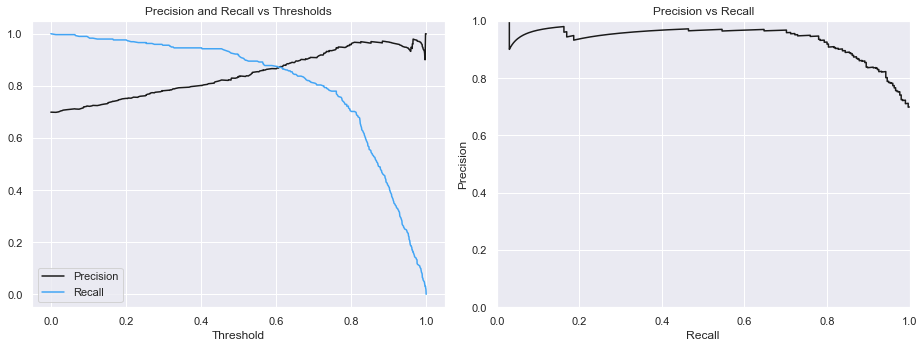

In [15]:
import numpy as np

# compute the relevant stats
precisions, recalls, thresholds = metrics.precision_recall_curve(y, df_wholesale['model_probs'])
thresholds = np.hstack([[0.], thresholds])  # n precisions but n-1 thresholds

plt.figure(figsize=(13, 5))

plt.subplot(121)
plt.plot(thresholds, precisions, 'k-',  label='Precision')
plt.plot(thresholds, recalls, c='#42a5f5ff', label='Recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold'); 
plt.title('Precision and Recall vs Thresholds')
    
plt.subplot(122)
plt.plot(recalls, precisions, 'k-')
# plt.fill_between(recalls, precisions, alpha=0.2)  # AUC value
plt.xlim([0., 1.]); plt.ylim([0., 1.])
plt.xlabel('Recall'); 
plt.ylabel('Precision')
plt.title('Precision vs Recall')
plt.tight_layout()